# Assignment on preprocessing

### 1.Loading the Dataset.

In [312]:
#importing the essential libraries

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [314]:
data=pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset (1).csv")

In [315]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### 2.Making ‘PassengerId’ as the index column.

In [316]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [317]:
data=pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset (1).csv",index_col='PassengerId')

In [318]:
data.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### 3.Checking the basic details of the dataset.

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


INFERENCE:We can see the no of entries and the dtypes.

In [320]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


INFERENCE:We get the descriptive statistics of this dataset.

In [321]:
data.shape

(891, 11)

INFERENCE:There are 891 Rows and 11 columns

In [322]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

INFERENCE:There are 891 unique entries in the column 'Name',That is all entries in 'Name' are unique.

## 4.Filling the missing values present in the dataset.

In [323]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

INFERENCE: Column 'Age' has 177 null values ,column 'Cabin' has 687 null values and column 'Embarked' has 2 null values.

In [324]:
data['Age'].dtypes

dtype('float64')

INFERENCE:The datatype is float64 so we need to check the distribution.

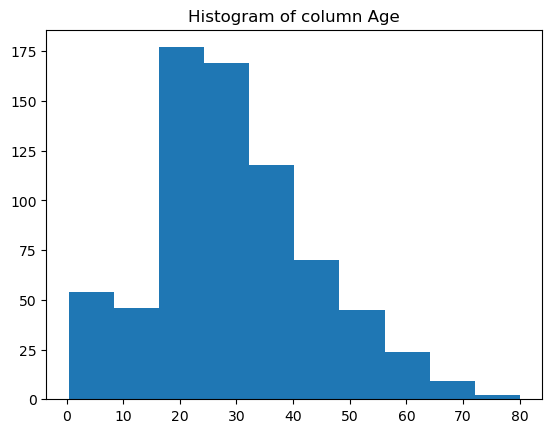

In [325]:
plt.hist(data['Age'])
plt.title('Histogram of column Age')
plt.show()

INFERENCE: It has skewed distribution.So we need to use Median for fill the null values.

In [326]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [327]:
data['Age'].isnull().sum()

0

INFERENCE:All null values in column Age is filled with median values of Column Age.

In [328]:
data['Embarked'].dtypes

dtype('O')

INFERENCE: The dtype of column Embarked is object,that means it is a categorical column.So we can will the null values with mode.

In [329]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [330]:
data['Embarked'].isnull().sum()

0

INFERENCE:The null values in column Embarked is filled with mode values of column embarked.

Note:Column Cabin has 687 null values of the 891 entries.That is 77% null values.Basically if a variable has 50% or more null values we must drop it.Filling the null values will affect the data.

Filling the Cabin column.It is a categorical column so we can fill the null values with mode.


In [331]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [332]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

INFERENCE:All null values are filled.

### 5. Checking and handling outliers in at least 3 columns in the dataset

Checking outliers of column Fare

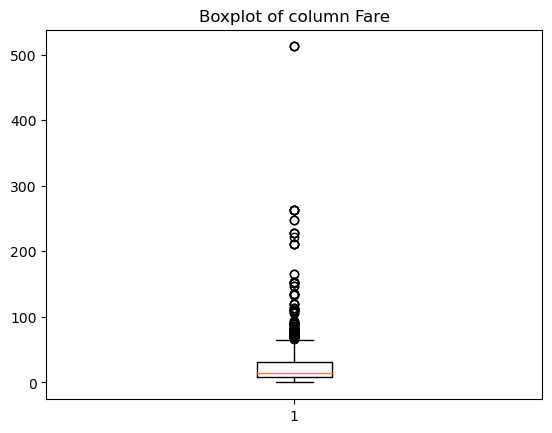

<Figure size 1000x900 with 0 Axes>

In [333]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of column Fare')
plt.figure(figsize=(10,9))
plt.show()

INFERENCE:From this we can saw a lot of outliers.

In [334]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q2=np.percentile(data['Fare'],50,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [335]:
print(q1)
print(q2)
print(q3)

7.9104
14.4542
31.0


In [336]:
iqr=q3-q1
print(iqr)

23.0896


INFERENCE:Inter Quartile Range of Column fare is 23.0896

In [337]:
up_limit=q3+(1.5*iqr)
low_limit=q1-(1.5*iqr)
print('Upper limit is :',up_limit)
print('Lower limit is :', low_limit)

Upper limit is : 65.6344
Lower limit is : -26.724


In [338]:
outlier = []
for i in data['Fare']:
    if((i>up_limit)or (i<low_limit)):
        outlier.append(i)

In [339]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

INFERENCE: These are the outliers in variable Fare.There are no values beyond Lower limit.

In [340]:
ind1=data['Fare']>up_limit

In [341]:
ind11=data.loc[ind1].index

In [342]:
data.drop(ind11,inplace=True)

We removed the outliers in Fare column.

##### Checking the outliers in the variable Age.

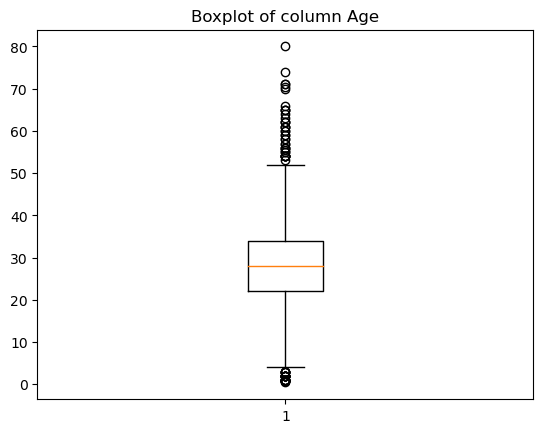

<Figure size 1000x900 with 0 Axes>

In [343]:
plt.boxplot(data['Age'])
plt.title('Boxplot of column Age')
plt.figure(figsize=(10,9))
plt.show()

INFERENCE:From this we can saw a lot of outliers.

In [344]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q2=np.percentile(data['Age'],50,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [345]:
print(q1)
print(q2)
print(q3)

22.0
28.0
34.0


In [346]:
iqr=q3-q1
print(iqr)

12.0


INFERENCE:Inter Quartile Range of Column Age is 12.0

In [347]:
up_limit=q3+(1.5*iqr)
low_limit=q1-(1.5*iqr)
print('Upper limit is :',up_limit)
print('Lower limit is :', low_limit)

Upper limit is : 52.0
Lower limit is : 4.0


In [348]:
outlier = []
for i in data['Age']:
    if((i>up_limit)or (i<low_limit)):
        outlier.append(i)

In [349]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

INFERENCE: These are the outliers in variable Age.There are  values beyond Lower and Upper limit.

In [350]:
ind2=data['Age']>up_limit

In [351]:
ind3=data['Age']<low_limit

In [352]:
ind21=data.loc[ind2].index

In [353]:
ind31=data.loc[ind3].index

In [354]:
data.drop(ind21,inplace=True)

In [355]:
data.drop(ind31,inplace=True)

We removed outliers in the column age

###### Checking the outliers in the variable 'SibSp'

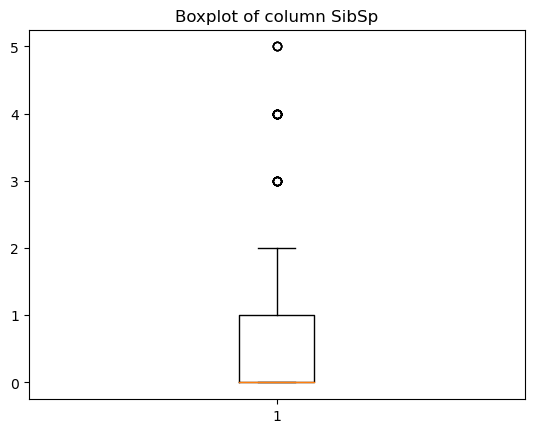

<Figure size 1000x900 with 0 Axes>

In [356]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of column SibSp')
plt.figure(figsize=(10,9))
plt.show()

INFERENCE:From this we can saw outliers.

In [357]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [358]:
print(q1)
print(q2)
print(q3)

0.0
0.0
1.0


In [359]:
iqr=q3-q1
print(iqr)

1.0


INFERENCE:Inter Quartile Range of Column SibSp is 1.0

In [360]:
up_limit=q3+(1.5*iqr)
low_limit=q1-(1.5*iqr)
print('Upper limit is :',up_limit)
print('Lower limit is :', low_limit)

Upper limit is : 2.5
Lower limit is : -1.5


In [361]:
outlier = []
for i in data['SibSp']:
    if((i>up_limit)or (i<low_limit)):
        outlier.append(i)

In [362]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

INFERENCE: These are the outliers in variable SibSp.There are values beyond Upper limit.

In [363]:
ind1=data['SibSp']>up_limit

In [364]:
ind11=data.loc[ind1].index

In [365]:
data.drop(ind11,inplace=True)

We removed the outliers in SibSp column.

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [366]:
data.shape

(681, 11)

In [367]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


We need to encode the categorical columns.

Here we can drop the Name column because all the entries are unique and it didn't contribute anything.

In [368]:
data1=data.drop('Name',axis=1)

In [369]:
data1.head(9)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,male,28.0,0,0,330877,8.4583,B96 B98,Q
9,1,3,female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,female,14.0,1,0,237736,30.0708,B96 B98,C
11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
13,0,3,male,20.0,0,0,A/5. 2151,8.0500,B96 B98,S


In [370]:
data1.select_dtypes(include='object')

,Sex,Ticket,Cabin,Embarked
PassengerId,,,,
1,male,A/5 21171,B96 B98,S
3,female,STON/O2. 3101282,B96 B98,S
4,female,113803,C123,S
5,male,373450,B96 B98,S
6,male,330877,B96 B98,Q
...,...,...,...,...
887,male,211536,B96 B98,S
888,female,112053,B42,S
889,female,W./C. 6607,B96 B98,S


We need to convert this categorical columns by LabelEncoding

In [371]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [372]:
data1['Sex'] =le.fit_transform(data1['Sex'])

In [373]:
data1['Ticket'] =le.fit_transform(data1['Ticket'])

In [374]:
data1['Cabin'] =le.fit_transform(data1['Cabin'])

In [375]:
data1['Embarked'] =le.fit_transform(data1['Embarked'])

In [376]:
data1.head(9)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,462,7.2500,21,2
3,1,3,0,26.0,0,0,582,7.9250,21,2
4,1,1,0,35.0,1,0,34,53.1000,27,2
5,0,3,1,35.0,0,0,415,8.0500,21,2
6,0,3,1,28.0,0,0,230,8.4583,21,1
9,1,3,0,27.0,0,2,295,11.1333,21,2
10,1,2,0,14.0,1,0,95,30.0708,21,0
11,1,3,0,4.0,1,1,531,16.7000,71,2
13,0,3,1,20.0,0,0,474,8.0500,21,2


Encoded the categorical columns using Labelencoder.

For Min Max Scaling we need to drop the target column and encoded columns

###### Dropping Target column

In [377]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

In [378]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,462,7.2500,21,2
3,3,0,26.0,0,0,582,7.9250,21,2
4,1,0,35.0,1,0,34,53.1000,27,2
5,3,1,35.0,0,0,415,8.0500,21,2
6,3,1,28.0,0,0,230,8.4583,21,1
...,...,...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,66,13.0000,21,2
888,1,0,19.0,0,0,10,30.0000,16,2
889,3,0,28.0,1,2,588,23.4500,21,2


## Target Column(y)

In [379]:
y

PassengerId
1      0
3      1
4      1
5      0
6      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 681, dtype: int64

Inference:y is the target column.

Removing encoded columns.

In [380]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [381]:
x1=x.drop(['Sex','Ticket','Cabin','Embarked'],axis=1)
y1=x.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],axis=1)

In [382]:
x1.head(9)

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
9,3,27.0,0,2,11.1333
10,2,14.0,1,0,30.0708
11,3,4.0,1,1,16.7000
13,3,20.0,0,0,8.0500


INFERENCE:x1 is the column where we have to use the min max scaling.

In [383]:
y1.head(9)

,Sex,Ticket,Cabin,Embarked
PassengerId,,,,
1,1,462,21,2
3,0,582,21,2
4,0,34,27,2
5,1,415,21,2
6,1,230,21,1
9,0,295,21,2
10,0,95,21,0
11,0,531,71,2
13,1,474,21,2


INFERENCE:y1 is our encoded columns.

### Min Max Scaling

In [384]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,28.616740,0.265786,0.268722,16.590772
std,0.721772,9.077604,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


In [385]:
from sklearn.preprocessing import MinMaxScaler

In [386]:
mm_scaler=MinMaxScaler(feature_range=(0,1))

In [387]:
x2=mm_scaler.fit_transform(x1)

In [388]:
x2

array([[1.        , 0.375     , 0.5       , 0.        , 0.11153846],
       [1.        , 0.45833333, 0.        , 0.        , 0.12192308],
       [0.        , 0.64583333, 0.5       , 0.        , 0.81692308],
       ...,
       [1.        , 0.5       , 0.5       , 0.33333333, 0.36076923],
       [0.        , 0.45833333, 0.        , 0.        , 0.46153846],
       [1.        , 0.58333333, 0.        , 0.        , 0.11923077]])

In [389]:
type(x2)

numpy.ndarray

INFERENCE:After doing the min max scaling the type of data change into array.

In [390]:
x1.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [391]:
x2=pd.DataFrame(x2,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [392]:
x2.head(9)

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.375000,0.5,0.000000,0.111538
1,1.0,0.458333,0.0,0.000000,0.121923
2,0.0,0.645833,0.5,0.000000,0.816923
3,1.0,0.645833,0.0,0.000000,0.123846
4,1.0,0.500000,0.0,0.000000,0.130128
5,1.0,0.479167,0.0,0.333333,0.171282
6,0.5,0.208333,0.5,0.000000,0.462628
7,1.0,0.000000,0.5,0.166667,0.256923
8,1.0,0.333333,0.0,0.000000,0.123846


In [393]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,28.616740,0.265786,0.268722,16.590772
std,0.721772,9.077604,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


In [394]:
x2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.512849,0.132893,0.044787,0.255243
std,0.360886,0.189117,0.247705,0.125542,0.204008
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.000000,0.000000,0.120834
50%,1.000000,0.500000,0.000000,0.000000,0.161538
75%,1.000000,0.604167,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000


INFERENCE:Comparing the statistics of dataset before and after the minmax scaling , we can see the data ranges from 0 to 1 